In [2]:
from dash import Dash, dcc, html, Input, Output
import plotly.graph_objects as go
from jupyter_dash import JupyterDash

In [1]:
from dash import Dash, html

app = Dash(__name__)

app.layout = html.Div([
    html.H1(children='Hello World')
])

if __name__ == '__main__':
    app.run() # app.run_server() also works

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8050
Press CTRL+C to quit
127.0.0.1 - - [31/May/2023 10:26:42] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [31/May/2023 10:26:44] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [31/May/2023 10:26:44] "GET /_dash-dependencies HTTP/1.1" 200 -


# Using Jupyter_dash

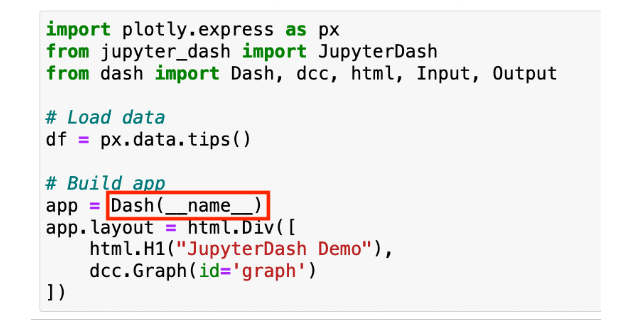

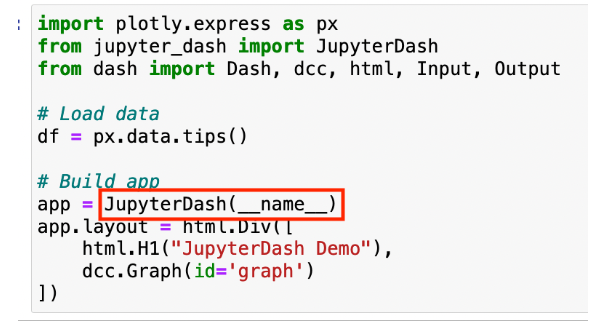

To view the running app directly in a Jupyter Notebook output cell (Only Works with Jypyter_dash)

app.run_server(mode="inline")

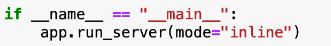

In [3]:
from jupyter_dash import JupyterDash
app = JupyterDash(__name__)

app.layout = html.Div([
    html.H1(children='Hello World')
])

if __name__ == '__main__':
    app.run_server(mode='inline')

Dash is running on http://127.0.0.1:8050/



- For more on Jubyter_dash: https://dash.plotly.com/workspaces/using-dash-in-jupyter-and-workspaces

# Dash HTML Component

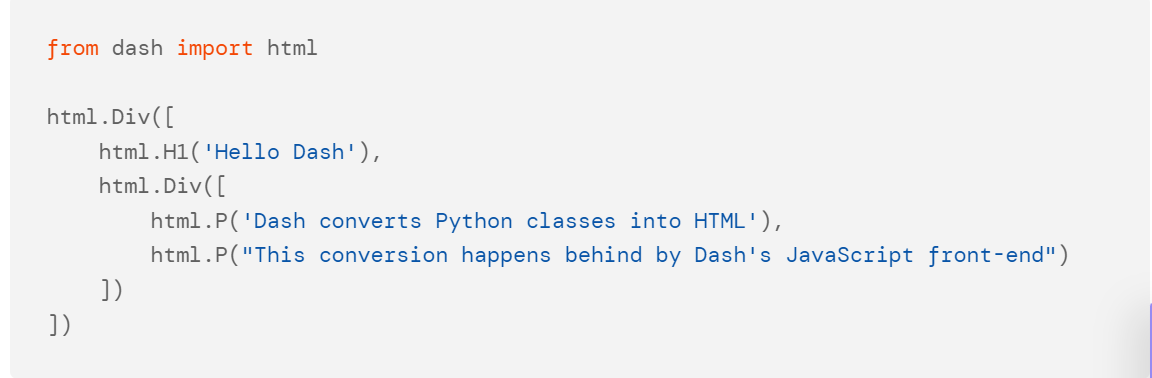

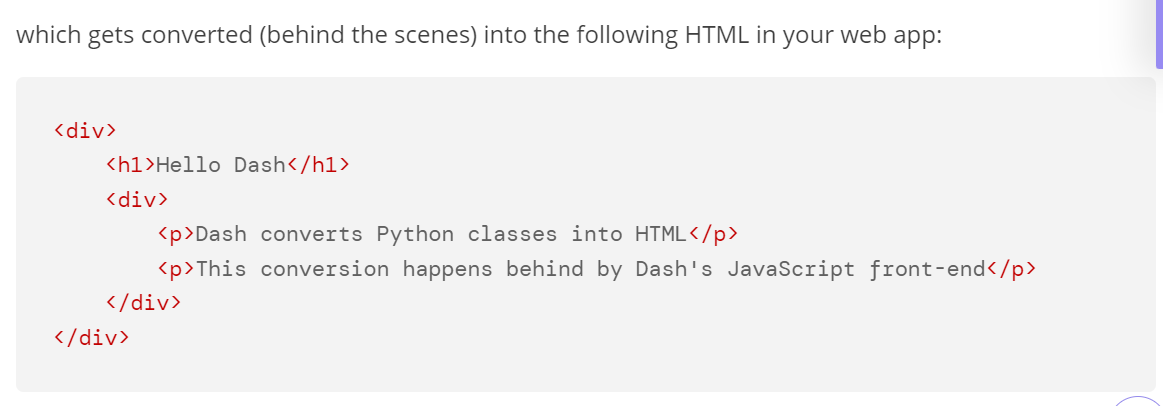

- HTML Styles

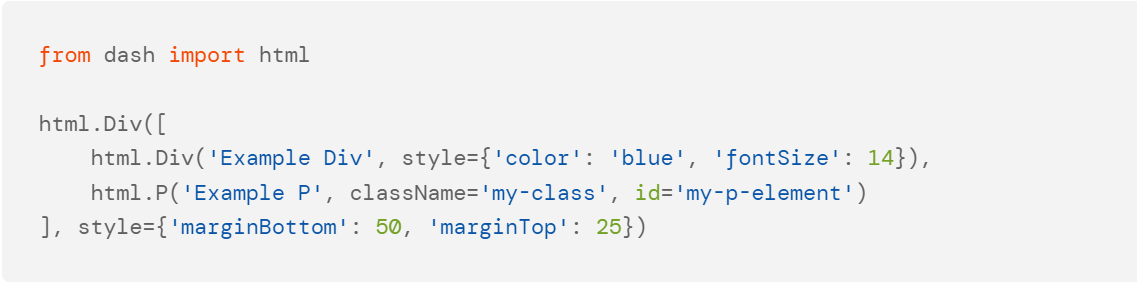

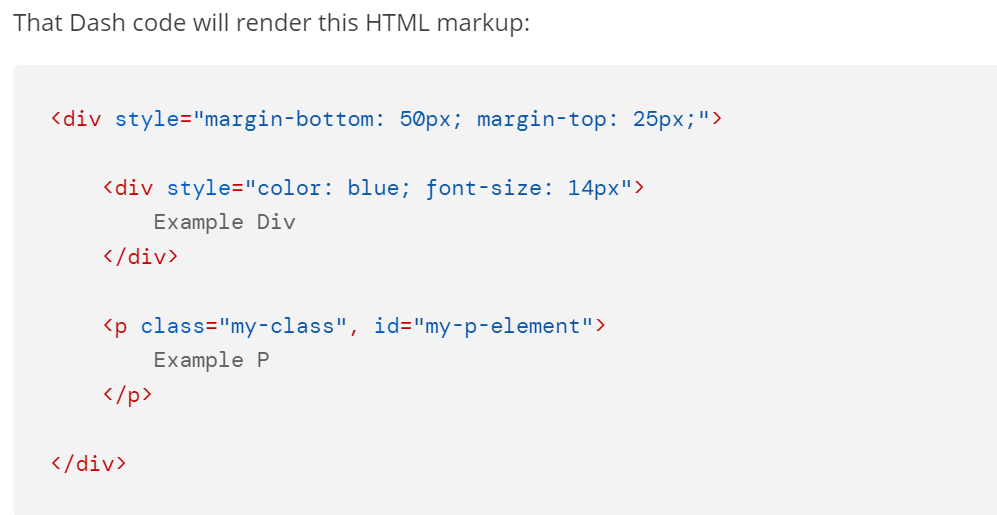

- For More on Dash-Html: https://dash.plotly.com/dash-html-components

# Call backs

- Input: value
- Output: HTML:childern, dcc.Graph:figure

In [1]:
from dash import Dash, dcc, html, Input, Output
from jupyter_dash import JupyterDash

app = JupyterDash(__name__)

app.layout = html.Div([
    html.H6("Change the value in the text box to see callbacks in action!"),
    html.Div([
        "Input: ",
        dcc.Input(id='my-input', value='initial value', type='text')
    ]),
    html.Br(),
    html.Div(id='my-output'),

])


@app.callback(
    Output(component_id='my-output', component_property='children'),
    Input(component_id='my-input', component_property='value')
)
def update_output_div(input_value):
    return f'Output: {input_value}'


if __name__ == '__main__':
    app.run_server(mode='inline')


Dash is running on http://127.0.0.1:8050/



- Multible Inputs

In [1]:
from dash import Dash, dcc, html, Input, Output
from jupyter_dash import JupyterDash

app = JupyterDash(__name__)

app.layout = html.Div([
    html.H6("Change the value in the text box to see callbacks in action!"),
    html.Div([
        "Input: ",
        dcc.Input(id='my-input', value='initial value', type='text')
    ]),
    html.Div([
        "Input: ",
        dcc.Input(id='my-input2', value='initial value 2', type='text')
    ]),
    html.Br(),
    html.Div(id='my-output'),

])


@app.callback(
    Output(component_id='my-output', component_property='children'),
    Input(component_id='my-input', component_property='value'),
    Input(component_id='my-input2', component_property='value')
)
def update_output_div(input_value, input_value2):
    return f'Output: {input_value} and the second: {input_value2}'


if __name__ == '__main__':
    app.run_server(mode='inline')


Dash is running on http://127.0.0.1:8050/



- Multible outputs

In [ ]:
from dash import Dash, dcc, html
from dash.dependencies import Input, Output

app = JupyterDash(__name__)

app.layout = html.Div([
    dcc.Input(
        id='num-multi',
        type='number',
        value=5
    ),
    html.Table([
        html.Tr(
            [html.Td(['x', html.Sup(2)]), html.Td(id='square')]
            ),
        html.Tr(
            [html.Td(['x', html.Sup(3)]), html.Td(id='cube')]
            ),
        html.Tr([html.Td([2, html.Sup('x')]), html.Td(id='twos')]),
        html.Tr([html.Td([3, html.Sup('x')]), html.Td(id='threes')]),
        html.Tr([html.Td(['x', html.Sup('x')]), html.Td(id='x^x')]),
    ]),
])


@app.callback(
    Output('square', 'children'),
    Output('cube', 'children'),
    Output('twos', 'children'),
    Output('threes', 'children'),
    Output('x^x', 'children'),
    Input('num-multi', 'value'))
def callback_a(x):
    return x**2, x**3, 2**x, 3**x, x**x


if __name__ == '__main__':
    app.run_server(mode='inline')


In [ ]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

import pandas as pd

app = Dash(__name__)

df = pd.read_csv('https://plotly.github.io/datasets/country_indicators.csv')

app.layout = html.Div([
    html.Div([

        html.Div([
            dcc.Dropdown(
                df['Indicator Name'].unique(),
                'Fertility rate, total (births per woman)',
                id='xaxis-column'
            ),
            dcc.RadioItems(
                ['Linear', 'Log'],
                'Linear',
                id='xaxis-type',
                inline=True
            )
        ], style={'width': '48%', 'display': 'inline-block'}),

        html.Div([
            dcc.Dropdown(
                df['Indicator Name'].unique(),
                'Life expectancy at birth, total (years)',
                id='yaxis-column'
            ),
            dcc.RadioItems(
                ['Linear', 'Log'],
                'Linear',
                id='yaxis-type',
                inline=True
            )
        ], style={'width': '48%', 'float': 'right', 'display': 'inline-block'})
    ]),

    dcc.Graph(id='indicator-graphic'),

    dcc.Slider(
        df['Year'].min(),
        df['Year'].max(),
        step=None,
        id='year--slider',
        value=df['Year'].max(),
        marks={str(year): str(year) for year in df['Year'].unique()},

    )
])


@app.callback(
    Output('indicator-graphic', 'figure'),
    Input('xaxis-column', 'value'),
    Input('yaxis-column', 'value'),
    Input('xaxis-type', 'value'),
    Input('yaxis-type', 'value'),
    Input('year--slider', 'value'))
def update_graph(xaxis_column_name, yaxis_column_name,
                 xaxis_type, yaxis_type,
                 year_value):
    dff = df[df['Year'] == year_value]

    fig = px.scatter(x=dff[dff['Indicator Name'] == xaxis_column_name]['Value'],
                     y=dff[dff['Indicator Name'] == yaxis_column_name]['Value'],
                     hover_name=dff[dff['Indicator Name'] == yaxis_column_name]['Country Name'])

    fig.update_layout(margin={'l': 40, 'b': 40, 't': 10, 'r': 0}, hovermode='closest')

    fig.update_xaxes(title=xaxis_column_name,
                     type='linear' if xaxis_type == 'Linear' else 'log')

    fig.update_yaxes(title=yaxis_column_name,
                     type='linear' if yaxis_type == 'Linear' else 'log')

    return fig


if __name__ == '__main__':
    app.run_server(debug=True)



- For More on Callbacks: https://dash.plotly.com/basic-callbacks

# DCC - Dash Core Component

In [ ]:
from dash import Dash, dcc, html, Input, Output

app = JupyterDash(__name__)

app.layout = html.Div([
    dcc.Input(
        placeholder='Enter a value...',
        type='text',
        value=''
    )
])

if __name__ == '__main__':
    app.run_server(mode='inline')

In [2]:
from dash import Dash, dcc, html

app = Dash(__name__)

app.layout = html.Div([
    dcc.Checklist(
        ['New York City', 'Montréal', 'San Francisco'],
        ['Montréal', 'San Francisco'],
        inline=True
    )
])

if __name__ == '__main__':
    app.run_server()

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8050
Press CTRL+C to quit


In [ ]:
from dash import Dash, dcc, html, Input, Output

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = JupyterDash(__name__, external_stylesheets=external_stylesheets)

server = app.server

app.layout = html.Div([
    html.H1('First Dcc Example'),
    dcc.Dropdown(['LA', 'NYC', 'MTL'],
        'LA',
        id='dropdown'
    ),
    html.Div(id='display-value')
])

@app.callback(Output('display-value', 'children'),
                [Input('dropdown', 'value')])
def display_value(value):
    return f'You have selected {value}'

if __name__ == '__main__':
    app.run_server(mode='inline')

# Plotly_Dash

In [2]:
from dash import Dash, dcc, html, Input, Output
import plotly.graph_objects as go
from jupyter_dash import JupyterDash
app = JupyterDash(__name__)


app.layout = html.Div([
    html.H4('Interactive color selection with simple Dash example'),
    html.P("Select color:"),
    dcc.Dropdown(
        id="dropdown",
        options=['Gold', 'MediumTurquoise', 'LightGreen'],
        value='Gold',
        clearable=False,
    ),
    dcc.Graph(id="graph"),
])


@app.callback(
    Output("graph", "figure"), 
    Input("dropdown", "value"))

    
def display_color(color):
    fig = x.Bar(y=[2, 3, 1], # replace with your own data source
                    marker_color=color)
    return fig


app.run_server(mode='inline')

Dash is running on http://127.0.0.1:8050/



In [1]:
from dash import Dash, dcc, html, Input, Output
import plotly.graph_objects as go
import numpy as np
from jupyter_dash import JupyterDash


app = JupyterDash(__name__) 
# app = Dash(__name__)


app.layout = html.Div([
    html.H4('Interactive plot with custom data source'),
    dcc.Graph(id="graph"),
    html.P("Number of bars:"),
    dcc.Slider(id="slider", min=2, max=10, value=4, step=1),
])


@app.callback(
    Output("graph", "figure"), 
    Input("slider", "value"))
    
def update_bar_chart(size):
    data = np.random.normal(3, 2, size=size) # fake data for example
    fig = go.Figure(
        data=[go.Bar(y=data)],
        layout_title_text="Native Plotly rendering in Dash"
    )
    return fig

# app.run()  
app.run_server(use_reloader=False, mode='inline') # Turn off reloader if inside Jupyter

Dash is running on http://127.0.0.1:8050/



In [2]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

app = Dash(__name__)

app.layout = html.Div([
    html.H4('Analysis of Iris data using scatter matrix'),
    dcc.Dropdown(
        id="dropdown",
        options=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
        value=['sepal_length', 'sepal_width'],
        multi=True
    ),
    dcc.Graph(id="graph"),
])


@app.callback(
    Output("graph", "figure"), 
    Input("dropdown", "value"))
def update_bar_chart(dims):
    df = px.data.iris() # replace with your own data source
    fig = px.scatter_matrix(
        df, dimensions=dims, color="species")
    return fig


app.run_server()

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8050
Press CTRL+C to quit
127.0.0.1 - - [31/May/2023 10:51:36] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [31/May/2023 10:51:37] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [31/May/2023 10:51:37] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [31/May/2023 10:51:39] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 304 -
127.0.0.1 - - [31/May/2023 10:51:39] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 304 -
127.0.0.1 - - [31/May/2023 10:51:39] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 304 -
127.0.0.1 - - [31/May/2023 10:51:43] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [31/May/2023 10:51:54] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [31/May/2023 10:51:57] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [31/May/2023 10:52:00] "POST /_dash-update-component HTTP/1.1" 200 -


In [ ]:
import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Bar(y=[2, 1, 3])],
    layout_title_text="A Figure Displayed with the 'svg - png - jpg' Renderer"
)
fig.show(renderer="jpg")

# Refrences:

- https://dash.plotly.com
- (dash / .app) documentaion: https://dash.plotly.com/reference
